# Decription
This is the analysis of the chlorophyll flurometer by taking measurements 
of chlorophyll standars via rhodamine dye. This analysis is to test the fluorometer's measurement sensitivity using serial dillutions of rhodamine dye.

# Fluormeter Testing

## Fluormeter Desgin 
This fluorometer is a benchtop model with housing which positions the LED and 
the AS7341 at a 90 degree angle as well as will be an opage design as to 
eliminate any ambient light from impacting the measurements. The TSL 2591
has been fitted with a red Rosculox #19 filter. The top of the benchtop design contains a hole 
which fits a cuvette. A cuvette is placed into the flurometer with the water
sample to begin testing. Design materials an be found at:
https://github.com/COAST-Lab/Chlorophyll-Fluorometer-/tree/main/Firmware. 


# Testing Procedure

## Step 1
A YSI instrument was calibrated to be used to verify the chlorophyll water sample which would be prepared. Calibration information: https://www.ysi.com/file%20library/documents/manuals/exo-user-manual-web.pdf

## Step 2
A water sample was prepared with a chlorophyll concentration of 63.5 ug/L and an RFU of 15.8 RFU. This water sample was prepared with rhodamine dye and DI water

## Chlorophyll Sample Preparation
### Step 1
5mL of Rhodamine dye was pipetted into a 1000mL volumetric flask or beaker. Fill the flask or beaker up to 1000mL mark with DI water

### Step 2
Pipette 5mL of the prepared solution in step 1 into a separate 1000mL volumetric flask or beaker. Fill this flask or beaker up to 1000mL mark with DI water. This will be your chlorophyll water sample

### Step 3
Verify the concentration of the prepared chlorophyll water sample with the YSI

## Water Dilutions  
Create dilutted water samples. From the 1000mL stock of 63.5 ug/L chlorophyll water sample prepare water samples dilluted to: 50 ug/L, 40 ug/L, 30 ug/L, 20 ug/L, 10ug/L, 8 ug/L, 6 ug/L, 4 ug/L, 2 ug/L, 0.75 ug/L, 0.5 ug/L and 0.25ug/L. 

## Step 3
Once the diluted water samples are prepared begin testing procedure.

## Step 4
To begin tests, insert a cuvette filled with DI water into the fluorometer, this will act as your "blank". Cover the flurometer with the box and run for 1 minute. 

## Step 5 
Stop readings and take the cuvette filled with DI water out of the flurometer. Insert a cuvette filled with the 0.25 ug/L solution. Cover the flurometer with the box and run for 1 minute.

## Step 6
Repeat the 1 minute tests for each diluted water sample. 

## Step 7
Stop testing and take the SD card out of the fluorometer and plug it into the computer to begin analysis of the data collected.

## Step 8
This test will be performed first with an LED intensity of 255 and a AS73411 gain of 512x and an ATIME of 59 and ASTEP of 599 and then repeated with a gain of 256x and then 128x. The data is recorded onto the SD card in the microcontroller. 

# Data Analysis

## Graphing
When taking measurements the AS7341 light sensor collects light measurements of multiple wavelengths. The wavelength of 680nm (denoted as F8) will be analyzed.

## Graph characteristics
Each graph shows the catagories of the water sample diltuion concentrations on the x-axis to denote each test. And the numerical value of the F8 light measurement on the y-axis. The mean of each category will be plotted with an error bar with extends from the lowest value of the data set to the largest.

### Step 1 
import necessary modules

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import r2_score, mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

### Step 2 
import file type (.csv file), convert F8 values to numeric, and specify the test values as the dillution values

In [2]:
# Replace with the actual file path
file_path = "AS7341_256gain_8_22.csv"

# Read the CSV file without skipping any rows
df = pd.read_csv(file_path, encoding='utf-8')

# Filter out rows where the 'Test' column is 'test'
df = df[df['Test'].str.lower() != 'test']

# Convert 'F8 (Raw)' column to numeric values
df['F8 (Raw)'] = pd.to_numeric(df['F8 (Raw)'], errors='coerce')

# Get unique test categories in the order of appearance
categories = df['Test'].unique()

# Create a dictionary to store the 'F8 (Raw)' values for each category
category_f8_raw_dict = {}

### Step 3 
calculate the mean and standard deviation for each category for 'F8 (Raw)' data

In [7]:
for category in categories:
    # Exclude the first data point from each category
    category_df = df[df['Test'] == category][1:]
    category_f8_raw_dict[category] = category_df['F8 (Raw)']
# Calculate the mean and standard deviation for each category for 'F8 (Raw)' data
category_f8_raw_means = np.array([np.mean(f8_raw_vals) for f8_raw_vals in category_f8_raw_dict.values()])
category_f8_raw_stdevs = np.array([np.std(f8_raw_vals) for f8_raw_vals in category_f8_raw_dict.values()])

### Step 4
define x-axis labels and create a scatter plot for the mean F8 values with error bars and legend

<ErrorbarContainer object of 3 artists>

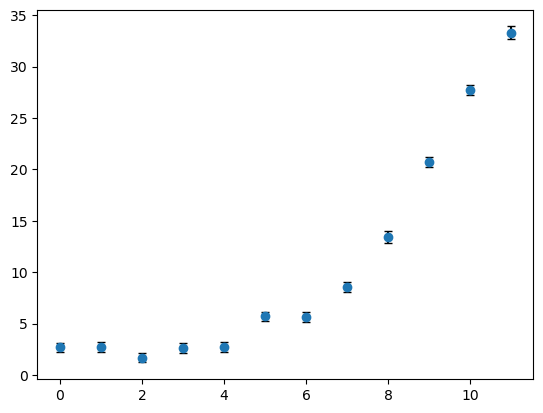

In [8]:
# Custom x-axis tick positions and labels
custom_tick_positions = np.arange(len(categories))
custom_tick_labels = categories  # Use the actual categories as labels

# Scatter plot for mean F8 values with error bars and legend
plt.errorbar(custom_tick_positions, category_f8_raw_means, yerr=category_f8_raw_stdevs, fmt='o', capsize=3, ecolor='black', label='Mean F8 (Raw) Values ± Stdev')

### Step 5
calculate and plot the line of best fit

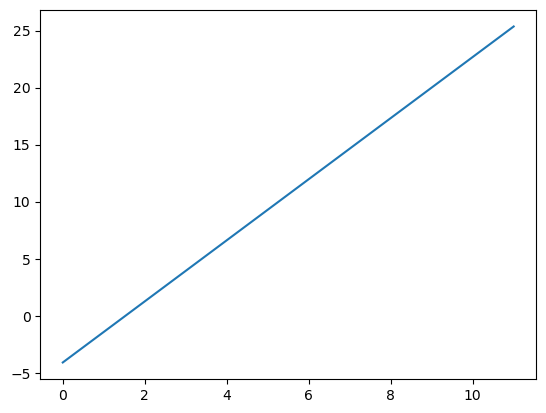

In [9]:
# Calculate the line of best fit parameters (slope and intercept)
slope, intercept, r_value, p_value, std_err = linregress(custom_tick_positions, category_f8_raw_means)

# Create a function to calculate predicted values using the line of best fit equation
def predict_values(x, slope, intercept):
    return slope * x + intercept

# Plot the line of best fit
plt.plot(custom_tick_positions, predict_values(custom_tick_positions, slope, intercept), label='Line of Best Fit')

### Step 6
Calculate R-squared and RMSE

In [10]:
# Calculate R-squared and RMSE
y_predicted = predict_values(custom_tick_positions, slope, intercept)
r_squared = r2_score(category_f8_raw_means, y_predicted)
rmse = np.sqrt(mean_squared_error(category_f8_raw_means, y_predicted))

NameError: name 'r2_score' is not defined

### Step 7 
plot entire data set with parameters descibed in steps 3-6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'r_squared' is not defined

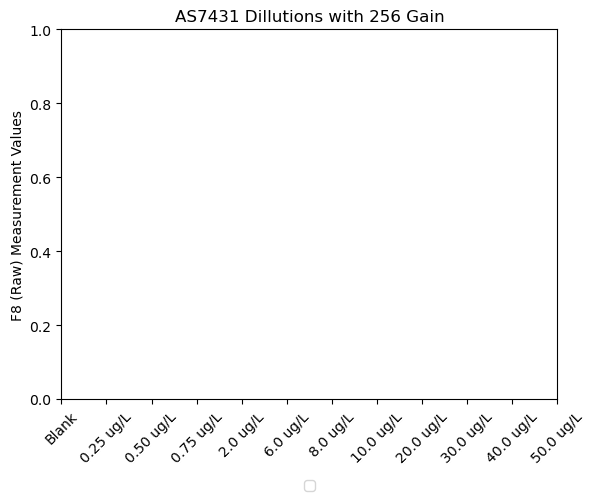

In [11]:
plt.ylabel('F8 (Raw) Measurement Values')
plt.title("AS7431 Dillutions with 256 Gain")

plt.xticks(custom_tick_positions, labels=custom_tick_labels, rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)  # Move legend down and adjust layout

# Display R-squared and RMSE on the plot
plt.annotate(f'R-squared: {r_squared:.4f}\nRMSE: {rmse:.4f}', xy=(0.05, 0.85), xycoords='axes fraction')

plt.tight_layout()
plt.show()